In [1]:
import pandas as pd

df_row = pd.read_csv("../data/seoul_purpose_admdong3_20240313.csv")

df_row

/tmp/ipykernel_19526/3880695149.py:3: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_row = pd.read_csv("../data/seoul_purpose_admdong3_20240313.csv")


,O_ADMDONG_CD,D_ADMDONG_CD,ST_TIME_CD,FNS_TIME_CD,IN_FORN_DIV_NM,FORN_CITIZ_NM,MOVE_PURPOSE,MOVE_DIST,MOVE_TIME,CNT,ETL_YMD
0,11110515.0,11110515.0,0,0,내국인,한국,7,351.80,1.746667,5.31,20240313
1,11110515.0,11110515.0,0,0,내국인,한국,3,1175.50,5.122500,6.67,20240313
2,11110515.0,11110530.0,0,0,단기외국인,ㆍ값없음,3,269.30,3.451667,3.50,20240313
3,11110515.0,11410660.0,0,0,내국인,한국,3,2163.75,8.155000,6.51,20240313
4,11110530.0,11110515.0,0,0,내국인,한국,3,697.35,7.052500,5.03,20240313
...,...,...,...,...,...,...,...,...,...,...,...
11436980,51780256.0,41650510.0,23,23,내국인,한국,7,36385.30,0.251667,2.13,20240313
11436981,51780256.0,41820345.0,23,23,내국인,한국,7,40474.20,5.416667,2.92,20240313
11436982,52130390.0,28720360.0,23,23,단기외국인,ㆍ값없음,7,135812.70,8.670000,3.50,20240313
11436983,NaN,28110540.0,23,23,내국인,한국,3,4014.00,2.751667,4.48,20240313


In [ ]:
# # 서울시 코드 여부를 확인하는 함수
# def is_seoul(code):
#     return str(code).startswith("11") and len(str(int(code))) == 8

# # 자치구 코드 추출 함수
# def get_gu(code):
#     return str(code)[:4]

# # 1. NaN 제거
# df_filtered = df_row.dropna(subset=["O_ADMDONG_CD", "D_ADMDONG_CD"])

# # 2. 서울시 코드인지 확인
# df_filtered = df_filtered[
#     df_filtered["O_ADMDONG_CD"].apply(is_seoul) &
#     df_filtered["D_ADMDONG_CD"].apply(is_seoul)
# ]

# # 3. 자치구 코드가 같은 경우만 필터링
# df_filtered = df_filtered[
#     df_filtered["O_ADMDONG_CD"].apply(get_gu) == df_filtered["D_ADMDONG_CD"].apply(get_gu)
# ]
# df_filtered

,O_ADMDONG_CD,D_ADMDONG_CD,ST_TIME_CD,FNS_TIME_CD,IN_FORN_DIV_NM,FORN_CITIZ_NM,MOVE_PURPOSE,MOVE_DIST,MOVE_TIME,CNT,ETL_YMD
0,11110515.0,11110515.0,0,0,내국인,한국,3,658.200000,6.624167,4.68,20240315
1,11110515.0,11110515.0,0,0,단기외국인,ㆍ값없음,1,632.500000,1.645000,3.50,20240315
2,11110515.0,11110515.0,0,0,장기외국인,미국,3,350.000000,2.868333,3.50,20240315
3,11110515.0,11110515.0,0,0,내국인,ㆍ값없음,7,552.850000,5.177500,6.67,20240315
4,11110515.0,11110515.0,0,0,내국인,ㆍ값없음,3,316.400000,1.319167,6.69,20240315
...,...,...,...,...,...,...,...,...,...,...,...
11731421,11740700.0,11740700.0,23,23,장기외국인,중국,7,50.000000,2.903333,3.50,20240315
11731422,11740700.0,11740700.0,23,23,내국인,ㆍ값없음,3,346.433333,7.882778,9.81,20240315
11731423,11740700.0,11740700.0,23,23,내국인,ㆍ값없음,7,401.400000,4.252222,17.66,20240315
11731424,11740700.0,11740700.0,23,23,단기외국인,ㆍ값없음,3,180.300000,0.575000,3.50,20240315


In [64]:
# 서울시 여부 확인
def is_seoul(code):
    return str(code).startswith("11") and len(str(int(code))) == 8

# 자치구 코드 추출
def get_gu(code):
    return str(code)[:5]

# 1. NaN 제거
df_filtered = df_row.dropna(subset=["O_ADMDONG_CD", "D_ADMDONG_CD"])

# 2. 서울시 & 자치구 동일 여부
df_filtered = df_filtered[
    df_filtered["O_ADMDONG_CD"].apply(is_seoul) &
    df_filtered["D_ADMDONG_CD"].apply(is_seoul) &
    (df_filtered["O_ADMDONG_CD"].apply(get_gu) == df_filtered["D_ADMDONG_CD"].apply(get_gu))
]

# 3. 자치구 컬럼 추가
df_filtered["자치구"] = df_filtered["O_ADMDONG_CD"].apply(get_gu)

# 4. 필요 없는 컬럼 제거
df_filtered = df_filtered.drop(columns=["O_ADMDONG_CD", "D_ADMDONG_CD", "IN_FORN_DIV_NM", "FORN_CITIZ_NM"])

df_filtered

,ST_TIME_CD,FNS_TIME_CD,MOVE_PURPOSE,MOVE_DIST,MOVE_TIME,CNT,ETL_YMD,자치구
0,0,0,7,351.800000,1.746667,5.31,20240313,11110
1,0,0,3,1175.500000,5.122500,6.67,20240313,11110
2,0,0,3,269.300000,3.451667,3.50,20240313,11110
4,0,0,3,697.350000,7.052500,5.03,20240313,11110
5,0,0,3,461.000000,1.755000,2.50,20240313,11110
...,...,...,...,...,...,...,...,...
11418865,23,23,7,316.335714,4.151905,41.22,20240313,11740
11418866,23,23,3,213.942857,4.301190,20.73,20240313,11740
11418867,23,23,7,160.025000,5.537083,11.75,20240313,11740
11418868,23,23,3,422.566667,3.967500,18.20,20240313,11740


In [65]:
gu_code_name_map = {
    "11110": "종로구",
    "11140": "중구",
    "11170": "용산구",
    "11200": "성동구",
    "11215": "광진구",
    "11230": "동대문구",
    "11260": "중랑구",
    "11290": "성북구",
    "11305": "강북구",
    "11320": "도봉구",
    "11350": "노원구",
    "11380": "은평구",
    "11410": "서대문구",
    "11440": "마포구",
    "11470": "양천구",
    "11500": "강서구",
    "11530": "구로구",
    "11545": "금천구",
    "11560": "영등포구",
    "11590": "동작구",
    "11620": "관악구",
    "11650": "서초구",
    "11680": "강남구",
    "11710": "송파구",
    "11740": "강동구"
}
# 매핑 딕셔너리 사용해서 자치구 코드 → 이름으로 변환
df_filtered['자치구'] = df_filtered['자치구'].map(gu_code_name_map)
df_filtered

,ST_TIME_CD,FNS_TIME_CD,MOVE_PURPOSE,MOVE_DIST,MOVE_TIME,CNT,ETL_YMD,자치구
0,0,0,7,351.800000,1.746667,5.31,20240313,종로구
1,0,0,3,1175.500000,5.122500,6.67,20240313,종로구
2,0,0,3,269.300000,3.451667,3.50,20240313,종로구
4,0,0,3,697.350000,7.052500,5.03,20240313,종로구
5,0,0,3,461.000000,1.755000,2.50,20240313,종로구
...,...,...,...,...,...,...,...,...
11418865,23,23,7,316.335714,4.151905,41.22,20240313,강동구
11418866,23,23,3,213.942857,4.301190,20.73,20240313,강동구
11418867,23,23,7,160.025000,5.537083,11.75,20240313,강동구
11418868,23,23,3,422.566667,3.967500,18.20,20240313,강동구


In [66]:
df_filtered['자치구'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [82]:
def simplify_time(t):
    t = int(t)
    if t >= 100:  # 3자리 이상이면 HHMM 형태라고 보고
        return t // 100
    else:
        return t  # 이미 정시(0~23)면 그대로

# 변환 적용
df_filtered["정시"] = df_filtered["ST_TIME_CD"].apply(simplify_time)

# 2. 피벗 테이블 생성
pivot_df = df_filtered.pivot_table(
    index="자치구",
    columns="정시",
    values="CNT",
    aggfunc="sum",
    fill_value=0
)

# 3. 정수형으로 변환
pivot_df = pivot_df.astype(int)

# 4. 컬럼 순서 정렬 (0시~23시)
pivot_df = pivot_df.reindex(sorted(pivot_df.columns), axis=1)
pivot_df

정시,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
자치구,,,,,,,,,,,,,,,,,,,,,
강남구,5268,10753,8406,7223,8740,12089,19633,42621,50634,43018,...,51998,56162,57021,65164,68985,51232,44655,36704,26715,5430
강동구,3295,6961,5155,4818,6797,9678,15783,28549,33583,22404,...,25955,30391,30421,30471,30087,26029,26276,20873,14491,3236
강북구,1988,3919,2812,2258,2870,4349,7153,10832,16406,11424,...,12122,14601,13746,14156,13921,12824,11461,10084,7057,1877
강서구,3300,6973,5046,4868,6597,9755,15856,30730,39687,26930,...,29905,32377,33301,37323,38229,29610,26640,22685,16261,3785
관악구,2889,5809,4608,3832,4984,5988,8966,17498,26117,19355,...,19478,21164,22550,24490,25412,20775,20205,17864,12993,2910
광진구,2754,5798,4087,3500,4326,5913,9471,17158,23630,17171,...,23271,21813,23070,24474,24042,20614,19358,16401,11810,2679
구로구,2349,4678,3057,2972,4529,5686,9018,16947,22335,15210,...,16583,19132,18273,19268,21157,16620,14871,12959,9334,2531
금천구,1605,2791,2282,2166,3012,4134,5737,11660,16057,10369,...,9803,10417,11535,13347,15619,11915,10065,8337,5883,1471
노원구,4052,8234,5588,4086,5188,7859,15812,27932,33829,24499,...,29839,32828,34488,33821,31036,26207,23440,22051,16399,3670


In [86]:
df_reset = pivot_df.reset_index()
df_reset.head()

정시,자치구,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,강남구,5268,10753,8406,7223,8740,12089,19633,42621,50634,...,51998,56162,57021,65164,68985,51232,44655,36704,26715,5430
1,강동구,3295,6961,5155,4818,6797,9678,15783,28549,33583,...,25955,30391,30421,30471,30087,26029,26276,20873,14491,3236
2,강북구,1988,3919,2812,2258,2870,4349,7153,10832,16406,...,12122,14601,13746,14156,13921,12824,11461,10084,7057,1877
3,강서구,3300,6973,5046,4868,6597,9755,15856,30730,39687,...,29905,32377,33301,37323,38229,29610,26640,22685,16261,3785
4,관악구,2889,5809,4608,3832,4984,5988,8966,17498,26117,...,19478,21164,22550,24490,25412,20775,20205,17864,12993,2910


In [87]:
import mysql.connector

gu_list = ['강남구', '강동구', '강북구', '강서구', '관악구', 
           '광진구', '구로구', '금천구', '노원구', '도봉구', 
           '동대문구', '동작구', '마포구', '서대문구', '서초구', 
           '성동구', '성북구', '송파구', '양천구', '영등포구', 
           '용산구', '은평구', '종로구', '중구', '중랑구']

conn = mysql.connector.connect(
host = "database-1.cb4o0sikaygu.ap-northeast-2.rds.amazonaws.com",
port = 3306,
user = "root",
password = "root762462",
database = "edadb"
)

In [88]:
df_db = df_reset.copy()
for i in range(len(gu_list)):
    df_db.iloc[i,0] = i

df_db['자치구']=df_db['자치구'].astype(int)

In [89]:
sql = "insert into moving_population values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s, %s,%s,%s,%s,%s,%s,%s,%s,%s,%s, %s,%s,%s,%s,%s)"
cursor = conn.cursor(buffered=True)

In [90]:
import numpy as np

def convert_types(row):
    new_row = []
    for item in row:
        if isinstance(item, (np.int64, np.integer)):
            new_row.append(int(item))
        elif isinstance(item, (np.float64, np.floating)):
            new_row.append(float(item))
        else:
            new_row.append(item)
    return tuple(new_row)

data = [convert_types(row) for row in df_db.values]

cursor.executemany(sql, data)
conn.commit()

----------

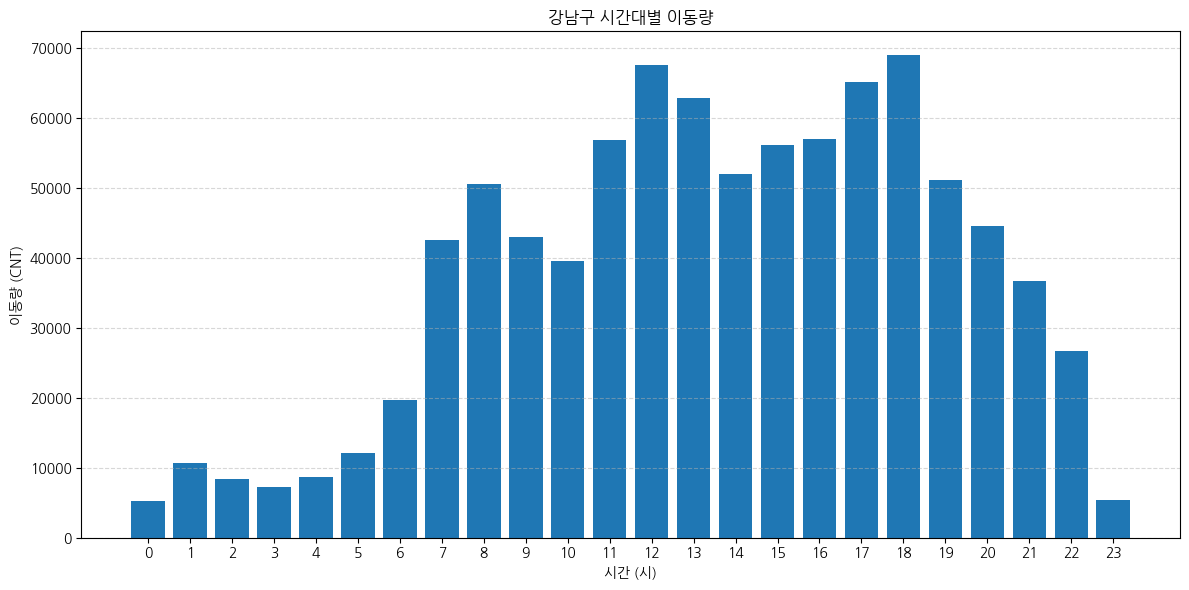

In [68]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 강남구 데이터만 필터링
gangnam = df_filtered[df_filtered["자치구"] == "강남구"]

# 시간별 CNT 합계 계산
gangnam_hourly = gangnam.groupby("정시")["CNT"].sum().sort_index()

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(gangnam_hourly.index, gangnam_hourly.values)
plt.xticks(range(0, 24))  # 0시 ~ 23시 정시 기준
plt.xlabel("시간 (시)")
plt.ylabel("이동량 (CNT)")
plt.title("강남구 시간대별 이동량")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

위는 자치구내에서

-------------

아래는 시작한 지치구 (도착은 서울내)

In [78]:
# 서울시 여부 확인
def is_seoul(code):
    return str(code).startswith("11") and len(str(int(code))) == 8

# 자치구 코드 추출
def get_gu(code):
    return str(code)[:5]

# 1. NaN 제거
df_filtered2 = df_row.dropna(subset=["O_ADMDONG_CD", "D_ADMDONG_CD"])

# 2. 서울시 & 자치구 동일 여부
df_filtered2 = df_filtered2[
    df_filtered2["O_ADMDONG_CD"].apply(is_seoul) &
    df_filtered2["D_ADMDONG_CD"].apply(is_seoul)
]

# 3. 자치구 컬럼 추가
df_filtered2["자치구"] = df_filtered2["O_ADMDONG_CD"].apply(get_gu)

# 4. 필요 없는 컬럼 제거
df_filtered2 = df_filtered2.drop(columns=["O_ADMDONG_CD", "D_ADMDONG_CD", "IN_FORN_DIV_NM", "FORN_CITIZ_NM"])

df_filtered2

,ST_TIME_CD,FNS_TIME_CD,MOVE_PURPOSE,MOVE_DIST,MOVE_TIME,CNT,ETL_YMD,자치구
0,0,0,7,351.800000,1.746667,5.31,20240313,11110
1,0,0,3,1175.500000,5.122500,6.67,20240313,11110
2,0,0,3,269.300000,3.451667,3.50,20240313,11110
3,0,0,3,2163.750000,8.155000,6.51,20240313,11110
4,0,0,3,697.350000,7.052500,5.03,20240313,11110
...,...,...,...,...,...,...,...,...
11418865,23,23,7,316.335714,4.151905,41.22,20240313,11740
11418866,23,23,3,213.942857,4.301190,20.73,20240313,11740
11418867,23,23,7,160.025000,5.537083,11.75,20240313,11740
11418868,23,23,3,422.566667,3.967500,18.20,20240313,11740


In [79]:
gu_code_name_map = {
    "11110": "종로구",
    "11140": "중구",
    "11170": "용산구",
    "11200": "성동구",
    "11215": "광진구",
    "11230": "동대문구",
    "11260": "중랑구",
    "11290": "성북구",
    "11305": "강북구",
    "11320": "도봉구",
    "11350": "노원구",
    "11380": "은평구",
    "11410": "서대문구",
    "11440": "마포구",
    "11470": "양천구",
    "11500": "강서구",
    "11530": "구로구",
    "11545": "금천구",
    "11560": "영등포구",
    "11590": "동작구",
    "11620": "관악구",
    "11650": "서초구",
    "11680": "강남구",
    "11710": "송파구",
    "11740": "강동구"
}
# 매핑 딕셔너리 사용해서 자치구 코드 → 이름으로 변환
df_filtered2['자치구'] = df_filtered2['자치구'].map(gu_code_name_map)
df_filtered2

,ST_TIME_CD,FNS_TIME_CD,MOVE_PURPOSE,MOVE_DIST,MOVE_TIME,CNT,ETL_YMD,자치구
0,0,0,7,351.800000,1.746667,5.31,20240313,종로구
1,0,0,3,1175.500000,5.122500,6.67,20240313,종로구
2,0,0,3,269.300000,3.451667,3.50,20240313,종로구
3,0,0,3,2163.750000,8.155000,6.51,20240313,종로구
4,0,0,3,697.350000,7.052500,5.03,20240313,종로구
...,...,...,...,...,...,...,...,...
11418865,23,23,7,316.335714,4.151905,41.22,20240313,강동구
11418866,23,23,3,213.942857,4.301190,20.73,20240313,강동구
11418867,23,23,7,160.025000,5.537083,11.75,20240313,강동구
11418868,23,23,3,422.566667,3.967500,18.20,20240313,강동구


In [83]:
def simplify_time(t):
    t = int(t)
    if t >= 100:  # 3자리 이상이면 HHMM 형태라고 보고
        return t // 100
    else:
        return t  # 이미 정시(0~23)면 그대로

# 변환 적용
df_filtered2["정시"] = df_filtered2["ST_TIME_CD"].apply(simplify_time)

# 2. 피벗 테이블 생성
pivot_df2 = df_filtered2.pivot_table(
    index="자치구",
    columns="정시",
    values="CNT",
    aggfunc="sum",
    fill_value=0
)

# 3. 정수형으로 변환
pivot_df2 = pivot_df2.astype(int)

# 4. 컬럼 순서 정렬 (0시~23시)
pivot_df2 = pivot_df2.reindex(sorted(pivot_df2.columns), axis=1)
pivot_df2.head()

정시,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
자치구,,,,,,,,,,,,,,,,,,,,,
강남구,8557,16442,12830,10520,11983,18145,36322,79884,89661,75133,...,97247,108452,118586,156488,180768,120032,101936,86822,53647,6840
강동구,3724,7808,5798,5587,8229,16236,34296,65118,63979,39353,...,36468,42548,45555,46220,44821,34758,34317,27174,17928,3431
강북구,2674,5125,3754,3234,4696,10115,19512,36186,39935,25482,...,22298,25277,25433,26288,26766,21489,18588,16315,10513,2285
강서구,4156,8455,6196,6040,8818,16202,33808,72004,76735,48233,...,45586,49970,53782,62787,64434,45393,39897,33372,22076,4302
관악구,3717,7199,5816,4794,7025,13345,25402,62327,74266,46937,...,32607,35220,38324,41670,42990,31808,30938,27370,18362,3347
